In [ ]:
#TODO: compare time series of large sale to time series of next auction's sales
#TODO: locations
#TODO: regressions, scikit
#TODO: plotly, can explore more
#TODO: standardize date-times with currency exchange rates

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [49]:
art_df = pd.read_csv('fina_artframe_2007-2017.csv')
art_df.head()

,Unnamed: 0,artist,auction_name,auction_number,currency,date,high,location,low,piece,sale,day,month,year,adj_sale_price
0,0,JAKOB STEINHARDT,israeli & international art,N09638,USD,20-December-2017,15000,NEW YORK,10000,JERUSALEM,13750,20,12,2017,14341.12
1,1,ANNA TICHO,israeli & international art,N09638,USD,20-December-2017,7000,NEW YORK,5000,WALLS OF JERUSALEM,5250,20,12,2017,5475.70
2,2,LUDWIG BLUM,israeli & international art,N09638,USD,20-December-2017,22000,NEW YORK,18000,VIEW OF JERUSALEM,0,20,12,2017,0.00
3,3,REUVEN RUBIN,israeli & international art,N09638,USD,20-December-2017,80000,NEW YORK,60000,CHASSIDIC DANCERS,68750,20,12,2017,71705.60
4,4,REUVEN RUBIN,israeli & international art,N09638,USD,20-December-2017,30000,NEW YORK,20000,THE VIOLETS,27500,20,12,2017,28682.24


In [50]:
#Creating 5% sample from the dataframe
art_df_sample = art_df.sample(8700)
art_df_sample


,Unnamed: 0,artist,auction_name,auction_number,currency,date,high,location,low,piece,sale,day,month,year,adj_sale_price
56525,67315,ALBERT MARQUET,art impressionniste et moderne,PF1416,EUR,04-December-2014,600000,PARIS,400000,"LE HAVRE, LE BASSIN",0,4,12,2014,0.00
129768,154913,ALEXANDRE CALAME 1810 - 1864,sotheby's | auctions - schweizer kunst / swiss...,ZH1003,CHF,14-June-2010,12000,ZURICH,8000,MARINE MARINE,37425,14,6,2010,43878.64
133127,159138,ZHENG WUCHANG 1894-1952,sotheby's | auctions - fine chinese paintings,HK0317,HKD,06-April-2010,300000,HONG KONG,200000,WADING IN THE WATER,48288,6,4,2010,56614.88
166436,196094,WANGECHI MUTU,sotheby's | auctions - contemporary art day au...,N08442,USD,15-May-2008,80000,NEW YORK,60000,LOIN,85000,15,5,2008,100931.85
114065,136481,NICOLAS DE LARGILLIERRE,sotheby's | auctions - old master paintings,N08760,USD,09-June-2011,60000,NEW YORK,40000,PORTRAIT OF FRANÇOIS-EMMANUEL POMMYER (1703-1779),74500,9,6,2011,84673.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128543,153561,JACQUES DE GHEYN THE YOUNGER,sotheby's | auctions - old master & british dr...,L10040,GBP,06-July-2010,30000,LONDON,20000,"""TRAYLE YOUR PIKE""",107440,6,7,2010,125967.16
23984,28181,LIU DU (ACTIVE 17TH CENTURY),fine classical chinese paintings,HK0670,HKD,03-October-2016,280000,HONG KONG,180000,AUTUMN LANDSCAPE AFTER LI CHENG,48350,3,10,2016,51502.78
167545,197203,BADRI NARAYAN,sotheby's | auctions - indian art,L08221,GBP,02-May-2008,5000,LONDON,3000,LANDSCAPE WITH HOUSE AND TREES,31947,2,5,2008,37934.94
141734,168731,BAROVIER & TOSO,"sotheby's | auctions - photographs, furniture,...",PF9093,EUR,23-September-2009,2200,PARIS,1800,"GRAND VASE, VERS 1940",5913,23,9,2009,7046.35


In [53]:
#finding currencies:
currencies = art_df['currency'].unique()

#separating currencies into their own dataframes
currency_dataframes = {}
for currency in currencies:
    currency_dataframes[currency] = art_df.loc[art_df['currency'] == currency]
currency_dataframes.keys()

usd_df = currency_dataframes['USD']
usd_df.head()

,Unnamed: 0,artist,auction_name,auction_number,currency,date,high,location,low,piece,sale,day,month,year,adj_sale_price
0,0,JAKOB STEINHARDT,israeli & international art,N09638,USD,20-December-2017,15000,NEW YORK,10000,JERUSALEM,13750,20,12,2017,14341.12
1,1,ANNA TICHO,israeli & international art,N09638,USD,20-December-2017,7000,NEW YORK,5000,WALLS OF JERUSALEM,5250,20,12,2017,5475.70
2,2,LUDWIG BLUM,israeli & international art,N09638,USD,20-December-2017,22000,NEW YORK,18000,VIEW OF JERUSALEM,0,20,12,2017,0.00
3,3,REUVEN RUBIN,israeli & international art,N09638,USD,20-December-2017,80000,NEW YORK,60000,CHASSIDIC DANCERS,68750,20,12,2017,71705.60
4,4,REUVEN RUBIN,israeli & international art,N09638,USD,20-December-2017,30000,NEW YORK,20000,THE VIOLETS,27500,20,12,2017,28682.24


<BarContainer object of 52977 artists>

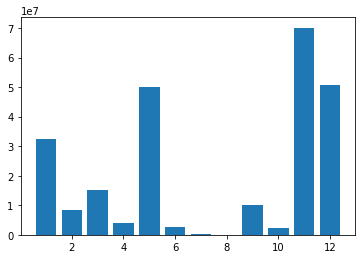

In [58]:
#removing rows that didn't sell
usd_df_sales = usd_df[usd_df['adj_sale_price'] != 0]

#plotting month against the value of the sales
plt.bar(usd_df_sales['month'], usd_df_sales['adj_sale_price'])
